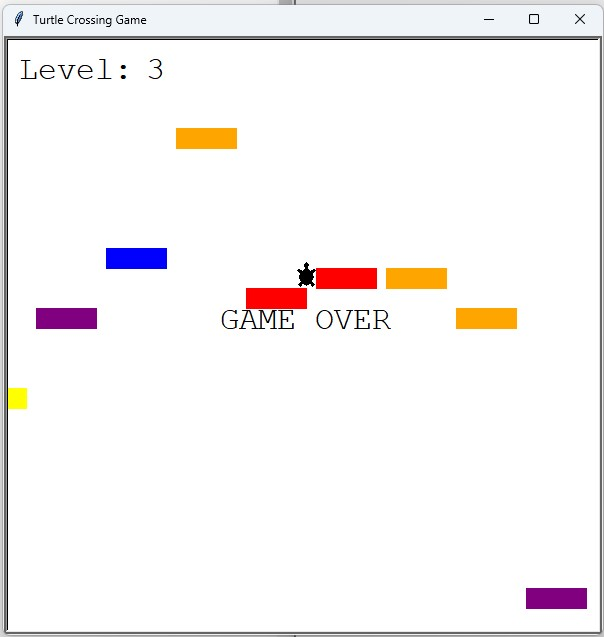

In [1]:
# turtle crossing game
# Playing scence of the game
from PIL import Image
from IPython.display import display
img = Image.open('turtle_crossing_game.jpg')
display(img)

In [ ]:
# My own sloution
# main.py
import time
from turtle import Screen
from player import Player, FINISH_LINE_Y
from car_manager import CarManager
from scoreboard import Scoreboard

screen = Screen()
screen.setup(width=600, height=600)
screen.title("Turtle Crossing Game")
screen.tracer(0)


player = Player()
score = Scoreboard()
car_manager = CarManager()

screen.listen()
screen.onkey(player.move, "Up")

a = 1
game_is_on = True
while game_is_on:
    time.sleep(0.1)
    screen.update()
    if a > 0:
        car_manager.car_generating()
    a *= -1
    car_manager.passing()

    if player.ycor() == FINISH_LINE_Y:
        # clear the cars
        car_manager.reset_cars()
        car_manager.speed_up()
        # player position update
        player.next_level_starting_position()
        # plyer score update
        score.score_up()

    for a_car in car_manager.cars:
        if player.ycor() == a_car.ycor() and (player.xcor() >= a_car.xcor()-30) and player.xcor() <= a_car.xcor():
            game_is_on = False
            score.game_over()


screen.exitonclick()

# reflection
# 1) I used variable 'a' to control the amount of the car, teacher used random_chance for it. teacher solution is better as it can set the probability to create a car
# 2) I call FINISH_LINE_Y from player.py. I could make a function in the Player class like is_at_finish_line. Then I don't need to call the FINISH_LINE_L variable.
# 3) My code to detect collision with car was same with teacher's code using for loop. Well doen.
# 4) Overall codes are similar. Well done to build and call classes and objects properly.

In [ ]:
# player.py
from turtle import Turtle

STARTING_POSITION = (0, -280)
MOVE_DISTANCE = 20
FINISH_LINE_Y = 280


class Player(Turtle):
    def __init__(self):
        super().__init__()
        self.shape("turtle")
        self.penup()
        self.setheading(90)
        self.goto(STARTING_POSITION)

    def move(self):
        self.fd(MOVE_DISTANCE)

    def next_level_starting_position(self):
        self.goto(STARTING_POSITION)

In [ ]:
# car_manager.py
from turtle import Turtle
import random

COLORS = ["red", "orange", "yellow", "green", "blue", "purple"]
STARTING_MOVE_DISTANCE = 5
MOVE_INCREMENT = 10
STARTING_LINE_X = 320


class CarManager:
    def __init__(self):
        self.cars = []

    def car_generating(self):
        a_car = Turtle("square")
        a_car.setheading(180)
        a_car.color(random.choice(COLORS))
        a_car.shapesize(stretch_wid=1, stretch_len=3)
        a_car.penup()
        a_car.goto(STARTING_LINE_X, random.randrange(-260,260, 20))
        self.cars.append(a_car)
    def passing(self):
        for car_num in range(len(self.cars)):
            new_x = self.cars[car_num].xcor() - STARTING_MOVE_DISTANCE
            self.cars[car_num].goto(new_x, self.cars[car_num].ycor())

    def reset_cars(self):
        for car_num in range(len(self.cars)):
            self.cars[car_num].hideturtle()
        self.cars = []

    def speed_up(self):
        global STARTING_MOVE_DISTANCE
        STARTING_MOVE_DISTANCE +=  MOVE_INCREMENT


class Car(Turtle):
    def __init__(self):
        super().__init__()
        self.setheading(180)
        self.shape("square")
        self.color(random.choice(COLORS))
        self.shapesize(stretch_wid=1, stretch_len=3)
        self.penup()
        self.goto(STARTING_LINE_X, random.randint(-580,580))

    def passing(self):
        self.fd(STARTING_MOVE_DISTANCE)

In [ ]:
# scoreboard.py
from turtle import Turtle
FONT = ("Courier", 24, "normal")

class Scoreboard(Turtle):
    def __init__(self):
        super().__init__()
        self.color("black")
        self.penup()
        self.hideturtle()
        self.score = 0
        self.update_scoreboard()

    def update_scoreboard(self):
        self.clear()
        self.goto(-220, 250)
        self.write("Level: ", align="center", font=FONT)
        self.goto(-150,250)
        self.write(self.score, align="center", font=FONT)

    def score_up(self):
        self.score +=1
        self.update_scoreboard()

    def game_over(self):
        self.goto(0, 0)
        self.write("GAME OVER", align="center", font=FONT)

In [ ]:
# teacher solution
# main.py
import time
from turtle import Screen
from player import Player
from car_manager import CarManager
from scoreboard import Scoreboard

screen = Screen()
screen.setup(width=600, height=600)
screen.tracer(0)

player = Player()
car_manager = CarManager()
scoreboard = Scoreboard()

screen.listen()
screen.onkey(player.go_up, "Up")

game_is_on = True
while game_is_on:
    time.sleep(0.1)
    screen.update()

    car_manager.create_car()
    car_manager.move_cars()

    # Detect collision with car
    for car in car_manager.all_cars:
        if car.distance(player) < 20:
            game_is_on = False
            scoreboard.game_over()

    # Detect successful crossing
    if player.is_at_finish_line():
        player.go_to_start()
        car_manager.level_up()
        scoreboard.increase_level()

screen.exitonclick()

In [ ]:
# player.py
from turtle import Turtle

STARTING_POSITION = (0, -280)
MOVE_DISTANCE = 10
FINISH_LINE_Y = 280

class Player(Turtle):

    def __init__(self):
        super().__init__()
        self.shape("turtle")
        self.penup()
        self.go_to_start()
        self.setheading(90)

    def go_up(self):
        self.fd(MOVE_DISTANCE)

    def go_to_start(self):
        self.goto(STARTING_POSITION)

    def is_at_finish_line(self):
        if self.ycor() > FINISH_LINE_Y:
            return True
        else:
            return False

In [ ]:
# car_manager.py
from turtle import Turtle
import random

COLORS = ["red", "orange", "yellow", "green", "blue", "purple"]
STARTING_MOVE_DISTANCE = 5
MOVE_INCREMENT = 10


class CarManager:

    def __init__(self):
        self.all_cars=[]
        self.car_speed = STARTING_MOVE_DISTANCE

    def create_car(self):
        random_chance = random.randint(1,6)
        if random_chance ==1:
            new_car = Turtle("square")
            new_car.shapesize(stretch_wid=1, stretch_len=2)
            new_car.penup()
            new_car.color(random.choice(COLORS))
            random_y = random.randint(-250, 250)
            new_car.goto(300, random_y)
            self.all_cars.append(new_car)

    def move_cars(self):
        for car in self.all_cars:
            car.backward(self.car_speed)

    def level_up(self):
        self.car_speed += MOVE_INCREMENT

In [ ]:
# scoreboard.py
from turtle import Turtle
FONT = ("Courier", 24, "normal")


class Scoreboard(Turtle):

    def __init__(self):
        super().__init__()
        self.level = 1
        self.hideturtle()
        self.penup()
        self.goto(-280, 250)
        self.update_scoreboard()

    def update_scoreboard(self):
        self.clear()
        self.write(f"Level: {self.level}", align="left", font=FONT)

    def increase_level(self):
        self.level +=1
        self.update_scoreboard()

    def game_over(self):
        self.goto(0,0)
        self.write(f"GAME OVER", align="center", font=FONT)